# Twitter Sentiment Analysis on Ronaldos Interview

### by Fredrick Ogheneyerhovwo

### Table of Content:

##### 1. Import libraries
##### 2. Data collection (Twitter API)
##### 3. Data gathering
##### 4. Data joining
##### 5. Data accessing
##### 6. Data preprocessing for sentiment analysis

#### 1. Import libraries

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
import spacy

#### 2.  Data collection (Twitter API)

In [ ]:
#twitter keys
consumer_keys = "---------------"
consumer_secrets = "---------------"
access_token = "---------------"
access_token_secret = "-------------"

In [ ]:
auth_handler = tweepy.OAuthHandler(consumer_keys, consumer_secrets) #Pass in Consumer key and secret for authentication by API
auth_handler.set_access_token(access_token, access_token_secret) # Pass in Access key and secret for authentication by API
api = tweepy.API(auth_handler, wait_on_rate_limit = True) #sleeps when API limit is reached


In [ ]:
#create keywords to search for , filter links, retweets, replies
search_term = "Ronaldo OR Christiano Ronaldo"
search_query = search_term + "-filter:retweets AND -filter:replies"

In [ ]:
# specifying limit of 100000 tweets
# I prefer to gather tweets in batches then join, due to twitter's tweet request limitation
limit=100000

In [ ]:
# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, \
                 tweet.user.location, tweet.retweet_count, tweet.favorite_count, \
                 tweet.user.followers_count, tweet.user.friends_count, tweet.user.verified, tweet.source])

# creating a dataframe and check number of rows and columns
df = pd.DataFrame(data, columns=columns)
df.shape

In [ ]:
# saving dataframe to a csv file
df.to_csv('ronaldo1.csv')

#### 2. Data collection (Twitter API)

###### I'll use the last tweet id in df.tail() as the max_id number. Specifying a maximum id lets the Twitter API collect tweets before that Id, Since, I need to pull older tweets.
##### the df.head() to get the first tweet as since_id  number, using the minimum id to collect tweets after that id to pull latest tweets

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, \
                       since_id=1593559328786563072, max_id= count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, \
                 tweet.user.location, tweet.retweet_count, tweet.favorite_count, \
                 tweet.user.followers_count, tweet.user.friends_count, tweet.user.verified, tweet.source])
    
    
# creating a dataframe
df = pd.DataFrame(data, columns=columns)
df.shape

In [ ]:
# saving dataframe to a csv file
df.to_csv('ronaldo18.csv')

#### 4. Data joining

In [2]:
# Reading in the files using pandas read_csv
df1 = pd.read_csv('ronaldo1.csv')
df2 = pd.read_csv('ronaldo2.csv')
df3 = pd.read_csv('ronaldo3.csv')
df4 = pd.read_csv('ronaldo4.csv')
df5 = pd.read_csv('ronaldo5.csv')
df6 = pd.read_csv('ronaldo6.csv')
df7 = pd.read_csv('ronaldo7.csv')
df8 = pd.read_csv('ronaldo8.csv')
df9 = pd.read_csv('ronaldo9.csv')
df10 = pd.read_csv('ronaldo10.csv')
df11 = pd.read_csv('ronaldo11.csv')
df12 = pd.read_csv('ronaldo12.csv')
df13 = pd.read_csv('ronaldo13.csv')
df14 = pd.read_csv('ronaldo14.csv')
df15 = pd.read_csv('ronaldo15.csv')
df16 = pd.read_csv('ronaldo16.csv')
df17 = pd.read_csv('ronaldo17.csv')
df18 = pd.read_csv('ronaldo18.csv')

In [3]:
# merge the dataframes as one
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18], ignore_index = True)
df.shape

(188187, 12)

#### Data accessing

 Data was assessed here for data quality issues such as missing data, incorrect datatypes, duplicates e.t.c. and Data Tidiness issues.
While assessing for duplicates, tweet id is considered as the Primary key/ Unique identifier for all the dataframe

### Column Descriptions

 id - Unique id for each tweet
 
 username - The twitter username of the tweeter
 
 time_of_tweet - The time the tweet was tweeted
 
 tweet - The content of the tweet
 
 location - Location of Tweeter
 
 retweets - The number of times the tweet has been retweeted
 
 likes - The number of times the tweet has been liked
 
 followers - The number of followers of the Tweeter
 
 following - The number of followings of the Tweeter
 
 verified - Whether the Tweeter is verified or not? True/False
 
 tweet_source - The Source of Tweet

In [4]:
# Checking the first five rows of dataframe
df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
0,0,1592840056129351680,Ammadutd,2022-11-16 11:20:37+00:00,The feeling among Manchester United staff and ...,NaN,0,0,5388,3139,False,Twitter for iPhone
1,1,1592840028971208704,Adrian_Maloney,2022-11-16 11:20:31+00:00,"Ronaldo: Man Utd Bosses ""Didn't Believe"" My Da...","Johannesburg, Soweto",0,0,686,3156,False,Twitter Web App
2,2,1592840009316732928,Judith_cohen_18,2022-11-16 11:20:26+00:00,ApprovedByFarmerChristmas Poland NATO GBBO Ron...,NaN,0,0,1278,1482,False,Twitter Web App
3,3,1592840005818683393,Ammadutd,2022-11-16 11:20:25+00:00,Manchester United are perplexed by Cristiano R...,NaN,0,0,5388,3139,False,Twitter for iPhone
4,4,1592840003780243457,brown_walkers7,2022-11-16 11:20:25+00:00,Is it just me or Ronaldo would end up looking ...,"Mumbai, India",0,0,716,840,False,Twitter for iPhone


In [5]:
# Checking the last five rows of dataframe
df.tail()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
188182,2445,1593559431370907648,iscorers,2022-11-18 10:59:09+00:00,Cristiano Ronaldo reveals what he really think...,world,0,0,217,361,False,WordPress.com
188183,2446,1593559426270633984,gloriouregen31,2022-11-18 10:59:08+00:00,Ronaldo really stick it to the Glazers for tha...,NaN,0,1,162,166,False,Twitter for Android
188184,2447,1593559412622368768,studiopixie,2022-11-18 10:59:05+00:00,Not Ronaldo caping for Arsenal 👀🤣 https://t.co...,LONDON TOWN,0,1,2439,881,False,Twitter for iPhone
188185,2448,1593559354535399425,bfb247,2022-11-18 10:58:51+00:00,https://t.co/4ifhTQitLg\n\nFrom Manchester to ...,Europe,0,0,179,710,False,Twitter Web App
188186,2449,1593559349288439811,Palaksha_Gowda_,2022-11-18 10:58:50+00:00,"Concept of telling ""someone bigger than club/t...",NaN,0,0,34,209,False,Twitter for Android


In [6]:
# Getting a concise summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188187 entries, 0 to 188186
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     188187 non-null  int64 
 1   id             188187 non-null  int64 
 2   username       188187 non-null  object
 3   time_of_tweet  188187 non-null  object
 4   tweet          188187 non-null  object
 5   location       122886 non-null  object
 6   retweets       188187 non-null  int64 
 7   likes          188187 non-null  int64 
 8   followers      188187 non-null  int64 
 9   following      188187 non-null  int64 
 10  verified       188187 non-null  bool  
 11  tweet_source   188187 non-null  object
dtypes: bool(1), int64(6), object(5)
memory usage: 16.0+ MB


In [7]:
# drop unneccessary columns
df.drop('Unnamed: 0', axis= 1, inplace= True)

In [8]:
# check columns
df.columns

Index(['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets',
       'likes', 'followers', 'following', 'verified', 'tweet_source'],
      dtype='object')

In [9]:
# check for duplicates 
df.duplicated(subset='id').sum()

11

In [10]:
# drop duplicates
df.drop_duplicates(inplace = True)
df.shape

(188177, 11)

In [11]:
# change data types
df['time_of_tweet'] = pd.to_datetime(df['time_of_tweet'])
df['id'] = df['id'].astype('str')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188177 entries, 0 to 188186
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   id             188177 non-null  object             
 1   username       188177 non-null  object             
 2   time_of_tweet  188177 non-null  datetime64[ns, UTC]
 3   tweet          188177 non-null  object             
 4   location       122877 non-null  object             
 5   retweets       188177 non-null  int64              
 6   likes          188177 non-null  int64              
 7   followers      188177 non-null  int64              
 8   following      188177 non-null  int64              
 9   verified       188177 non-null  bool               
 10  tweet_source   188177 non-null  object             
dtypes: bool(1), datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 16.0+ MB


In [13]:
# split time_of_tweets columns to date and time
df['time'],df['date']= df['time_of_tweet'].apply(lambda x:x.time()), df['time_of_tweet'].apply(lambda x:x.date())

In [14]:
df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,time,date
0,1592840056129351680,Ammadutd,2022-11-16 11:20:37+00:00,The feeling among Manchester United staff and ...,NaN,0,0,5388,3139,False,Twitter for iPhone,11:20:37,2022-11-16
1,1592840028971208704,Adrian_Maloney,2022-11-16 11:20:31+00:00,"Ronaldo: Man Utd Bosses ""Didn't Believe"" My Da...","Johannesburg, Soweto",0,0,686,3156,False,Twitter Web App,11:20:31,2022-11-16
2,1592840009316732928,Judith_cohen_18,2022-11-16 11:20:26+00:00,ApprovedByFarmerChristmas Poland NATO GBBO Ron...,NaN,0,0,1278,1482,False,Twitter Web App,11:20:26,2022-11-16
3,1592840005818683393,Ammadutd,2022-11-16 11:20:25+00:00,Manchester United are perplexed by Cristiano R...,NaN,0,0,5388,3139,False,Twitter for iPhone,11:20:25,2022-11-16
4,1592840003780243457,brown_walkers7,2022-11-16 11:20:25+00:00,Is it just me or Ronaldo would end up looking ...,"Mumbai, India",0,0,716,840,False,Twitter for iPhone,11:20:25,2022-11-16


In [15]:
# change date datatype
df['date'] = pd.to_datetime(df['date'])

In [16]:
# subset dataframe to date = or > 13 nov 2022
datee = '2022-11-13 00:00:00+00:00'
df = df[df['time_of_tweet'] >= datee]

In [17]:
df.shape

(183149, 13)

In [18]:
# save df to csv
df.to_csv('clean_ronaldo.csv', index = False)

In [19]:
# Defining a function to extract hashtags with REGEX(Regular Expressions)
def getHashtags(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [20]:
df['hashtags'] = df['tweet'].apply(getHashtags)
df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,time,date,hashtags
0,1592840056129351680,Ammadutd,2022-11-16 11:20:37+00:00,The feeling among Manchester United staff and ...,NaN,0,0,5388,3139,False,Twitter for iPhone,11:20:37,2022-11-16,#mufc
1,1592840028971208704,Adrian_Maloney,2022-11-16 11:20:31+00:00,"Ronaldo: Man Utd Bosses ""Didn't Believe"" My Da...","Johannesburg, Soweto",0,0,686,3156,False,Twitter Web App,11:20:31,2022-11-16,
2,1592840009316732928,Judith_cohen_18,2022-11-16 11:20:26+00:00,ApprovedByFarmerChristmas Poland NATO GBBO Ron...,NaN,0,0,1278,1482,False,Twitter Web App,11:20:26,2022-11-16,#protectfish
3,1592840005818683393,Ammadutd,2022-11-16 11:20:25+00:00,Manchester United are perplexed by Cristiano R...,NaN,0,0,5388,3139,False,Twitter for iPhone,11:20:25,2022-11-16,#mufc
4,1592840003780243457,brown_walkers7,2022-11-16 11:20:25+00:00,Is it just me or Ronaldo would end up looking ...,"Mumbai, India",0,0,716,840,False,Twitter for iPhone,11:20:25,2022-11-16,


#### What is the total number of unique hashtag?
#### What are the top hashtags?

In [21]:
# Store hashtags in a list
hashtags_list = df['hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Importing Collection module to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  9141


In [22]:
# Checking the hashtag dataframe for the top 5 hashtags used
hashtags_df.head()

,hashtags,count
0,#mufc,12069
14,#ronaldo,11396
34,#cristianoronaldo,3132
27,#ronaldointerview,2575
61,#glazersout,2451


In [23]:
# save hashtag df
hashtags_df.to_csv("ronaldo_hashtags.csv", index= False)

### 6. Data preprocessing for sentiment analysis

In [24]:
df.columns

Index(['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets',
       'likes', 'followers', 'following', 'verified', 'tweet_source', 'time',
       'date', 'hashtags'],
      dtype='object')

In [25]:
# drop all columns except Tweet column
df_text = df.drop(['id', 'username', 'time_of_tweet', 'location', 'retweets',
       'likes', 'followers', 'following', 'verified', 'tweet_source', 'time',
       'date', 'hashtags'], axis = 1)
df_text.head()

,tweet
0,The feeling among Manchester United staff and ...
1,"Ronaldo: Man Utd Bosses ""Didn't Believe"" My Da..."
2,ApprovedByFarmerChristmas Poland NATO GBBO Ron...
3,Manchester United are perplexed by Cristiano R...
4,Is it just me or Ronaldo would end up looking ...


In [26]:
# create a function to clean the tweets

def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\s+|www\s+https\s+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'rt', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [27]:
# apply the function
df_text['tweet'] = df_text['tweet'].apply(data_processing)
df_text.head()

,tweet
0,feeling among manchester united staff players ...
1,ronaldo man utd bosses didnt believe daughter ...
2,approvedbyfarmerchristmas poland nato gbbo ron...
3,manchester united perplexed cristiano ronaldos...
4,ronaldo would end looking like piers 20 years ...


In [28]:
df_text.shape

(183149, 1)

In [29]:
# check how many duplicate rows we have
df_text.duplicated().sum()

7110

In [30]:
# drop duplicate rows
df_text.drop_duplicates(inplace=True)

In [31]:
# check how many duplicate rows we have again
df_text.duplicated().sum()

0

In [32]:
df_text.shape

(176039, 1)

In [33]:
# create a function to stem the tweets i.e remove basic words
stemmer = PorterStemmer()

def stemming (data):
    text = [stemmer.stem(word) for word in data]
    return data

# apply the function
df_text['tweet'] = df_text['tweet'].apply(lambda x: stemming(x))

In [34]:
# create a function with textblob to get the polarity score which shows the sentiments
def polarity (text):
    return TextBlob(text).sentiment.polarity

# apply function
df_text['polarity'] = df_text['tweet'].apply(polarity)
df_text.head()

,tweet,polarity
0,feeling among manchester united staff players ...,0.125000
1,ronaldo man utd bosses didnt believe daughter ...,-0.714286
2,approvedbyfarmerchristmas poland nato gbbo ron...,0.000000
3,manchester united perplexed cristiano ronaldos...,0.200000
4,ronaldo would end looking like piers 20 years ...,0.000000


In [35]:
# create a function to attribute the sentiments in words and apply
def sentiment(label):
    if label < 0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label > 0:
        return "Positive"
    
df_text['sentiments'] = df_text['polarity'].apply(sentiment)
df_text.head()

,tweet,polarity,sentiments
0,feeling among manchester united staff players ...,0.125000,Positive
1,ronaldo man utd bosses didnt believe daughter ...,-0.714286,Negative
2,approvedbyfarmerchristmas poland nato gbbo ron...,0.000000,Neutral
3,manchester united perplexed cristiano ronaldos...,0.200000,Positive
4,ronaldo would end looking like piers 20 years ...,0.000000,Neutral


#### What is the % of users sentiments towards Ronaldo's interview?

In [36]:
# check for the % of sentiments
df_text['sentiments'].value_counts(normalize = True)

Neutral     0.399508
Positive    0.388431
Negative    0.212061
Name: sentiments, dtype: float64

In [37]:
# save df_text to csv
df_text.to_csv("ronaldo_df_text.csv", index=False)

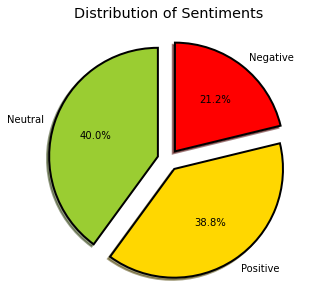

In [38]:
# visuals the %
fig = plt.figure (figsize = (5,5))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, "edgecolor": "black"}
tags = df_text["sentiments"].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind="pie", autopct='%1.1f%%', shadow = True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label ='')
plt.title('Distribution of Sentiments')
plt.show()

In [39]:
# subset for only positive tweets
pos_tweets = df_text[df_text.sentiments == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending = False)
pos_tweets.head()

,tweet,polarity,sentiments
38624,ronaldo impressed glazers slams man utds owner...,1.0,Positive
85862,think best thing come ronaldo interview sancho...,1.0,Positive
88041,think agree messi greatest footballer time eve...,1.0,Positive
80945,ronaldo deserve best,1.0,Positive
153932,ronaldo roy keane best captain ever mufc,1.0,Positive


#### What are the most frequent words in positive tweets?

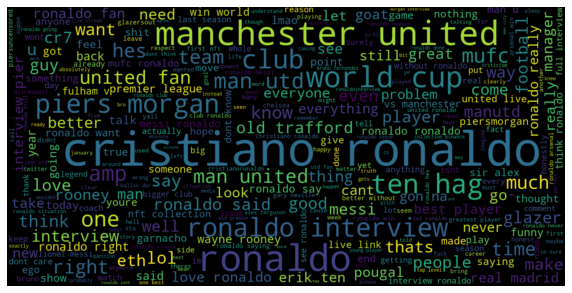

In [40]:
# use word cloud to visualize frequent words
text = ' '.join([word for word in pos_tweets['tweet']])
plt.figure(figsize = (10, 7.5), facecolor = 'None')
wordcloud = WordCloud(max_words=300, width=1600, height=800, background_color = "black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### let's find the value counts for this words

In [41]:
# put the words in the tweet column into a list
all_sentence =[]
for words in pos_tweets.tweet:
    all_sentence.append(words)
    
# split the words
lines = list()
for line in all_sentence:
    words = line.split()
    for w in words:
        lines.append(w)
        
# remove space
lines2 = []
for word in lines:
    if word != '':
        lines2.append(word)
        
# create a dataframe from the list and save to csv
pos_tweet_df = pd.DataFrame(lines2)
pos_tweet_df.to_csv('ronaldo_pos_tweet_df.csv', index = False)



In [57]:
# check for top 10 words in positive tweets
pdf = pos_tweet_df[0].value_counts()

pdf = pd.DataFrame(pdf).reset_index().rename(columns = {"index": "text", 0:'total_counts'})

pdf = pdf[pdf['total_counts'] > 10000]
pdf.head(7)

,text,total_counts
0,ronaldo,69193
1,cristiano,14774
2,united,13641
3,interview,11293
4,club,10438


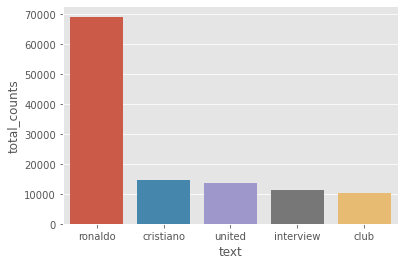

In [59]:
sns.barplot(data = pdf, x= pdf.text, y = pdf.total_counts)

plt.show()

#### What are the most frequent words in negative tweets?

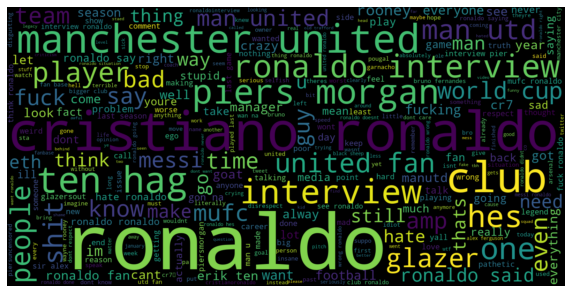

In [60]:
neg_tweets = df_text[df_text.sentiments == 'Negative']


text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize = (10, 7.5), facecolor = 'None')
wordcloud = WordCloud(max_words=300, width=1600, height=800, background_color = 'black').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### fine the value counts for negative tweets words

In [61]:
all_sentence =[]
for words in neg_tweets.tweet:
    all_sentence.append(words)

lines = list()
for line in all_sentence:
    words = line.split()
    for w in words:
        lines.append(w)
        
lines22 = []
for word in lines:
    if word != '':
        lines22.append(word)
        
neg_tweet_df = pd.DataFrame(lines22)

neg_tweet_df.to_csv('ronaldo_neg_tweet_df.csv', index = False)

In [66]:
# check for top 10 words in negative tweets
ndf = neg_tweet_df[0].value_counts()

ndf = pd.DataFrame(ndf).reset_index().rename(columns = {"index": "text", 0:'total_counts'})

ndf = ndf[ndf['total_counts'] > 3000]
ndf.head(20)

,text,total_counts
0,ronaldo,38318
1,united,7414
2,club,6429
3,cristiano,6308
4,interview,6140
5,man,4670
6,hes,4220
7,like,3442
8,fans,3412
9,manchester,3226


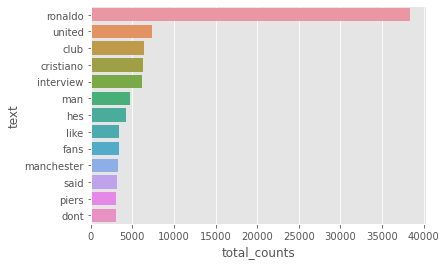

In [68]:
sns.barplot(data = ndf, x= ndf.total_counts, y = ndf.text)

plt.show()